In [11]:
from matplotlib.pyplot import figure
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd
import matplotlib.pyplot as plt
from csv import reader
import sys 
import numpy as np

In [12]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/notebooks /challenges_cleaned_corrected.csv')

In [13]:
df.head()

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,basis,location_descp,city,location,weight
0,972,Araya v. Bolli,Semanario La Prensa. Los Andes,1928-04-05,882,"Araya, Manuel",780,"Bolli, Carlos",NaN,NaN,NaN,"Manager's business, downtown Los Andes.",Los Andes,POINT(-70.600875 -32.835752),1
1,975,Valdes v. Pérez,Semanario La Prensa. Los Andes,1928-04-08,833,"Valdes, Mario",272,"Pérez, Amador",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.688871 -32.833203),2
2,978,Ortiz v. Araya,Semanario La Prensa. Los Andes,1928-04-08,976,"Ortiz, Rafael",882,"Araya, Manuel",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.598582 -32.833016),2
3,985,Valdes v. Gallardo,Semanario La Prensa. Los Andes,1928-04-29,833,"Valdes, Mario",827,"Gallardo, Pedro",NaN,NaN,NaN,NaN,Los Andes,POINT(-70.593621 -32.834478),2
4,986,Silva v. Iñiguez,Los Sports,1924-02-01,189,"Silva, Carlos",987,"Iñiguez, Mario",accepted,NaN,NaN,NaN,Antofagasta,POINT(-70.397502 -23.650928),1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   challenge_id       178 non-null    int64 
 1   rec_Title          178 non-null    object
 2   source             178 non-null    object
 3   source_year        178 non-null    object
 4   challenging_id     178 non-null    int64 
 5   boxer_challenging  178 non-null    object
 6   challenged_id      178 non-null    int64 
 7   boxer_challenged   178 non-null    object
 8   status             39 non-null     object
 9   condition          24 non-null     object
 10  basis              19 non-null     object
 11  location_descp     7 non-null      object
 12  city               140 non-null    object
 13  location           141 non-null    object
 14  weight             178 non-null    int64 
dtypes: int64(4), object(11)
memory usage: 21.0+ KB


In [14]:
#option D which mixes the from_pandas_edgelist and the adding metadata with a loop
CH = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id', edge_attr='weight')
CH.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
CH.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
for box, row in df.iterrows():
    CH.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    CH.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
    CH.nodes[row['challenging_id']]['source'] = row['source']
    CH.nodes[row['challenging_id']]['date'] = row['source_year']
for r, d in df.iterrows():
    CH.add_edge(d['challenging_id'], d['challenged_id'], date = d['source_year'], challenge = d['rec_Title'])    
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(CH)
for n in CH.nodes():
    CH.nodes[n]['centrality'] = dcs[n]
len(CH.nodes), len(CH.edges)

(259, 171)

In [117]:
CH.nodes(data=True)

NodeDataView({882: {'bipartite': 'challenged', 'name': 'Araya, Manuel', 'source': 'Semanario La Prensa. Los Andes', 'date': '1928-04-05', 'centrality': 0.007751937984496124, 'degree': 2, 'betweenness': 3.0163182819051065e-05, 'modularity': 12}, 780: {'bipartite': 'challenged', 'name': 'Bolli, Carlos', 'centrality': 0.003875968992248062, 'degree': 1, 'betweenness': 0.0, 'modularity': 12}, 833: {'bipartite': 'challenged', 'name': 'Valdes, Mario', 'source': 'Semanario La Prensa. Los Andes', 'date': '1928-01-01', 'centrality': 0.015503875968992248, 'degree': 4, 'betweenness': 0.0015684855065906554, 'modularity': 0}, 272: {'bipartite': 'challenged', 'name': 'Pérez, Amador', 'centrality': 0.003875968992248062, 'degree': 1, 'betweenness': 0.0, 'modularity': 0}, 976: {'bipartite': 'challenger', 'name': 'Ortiz, Rafael', 'source': 'Semanario La Prensa. Los Andes', 'date': '1928-04-08', 'centrality': 0.003875968992248062, 'degree': 1, 'betweenness': 0.0, 'modularity': 12}, 827: {'bipartite': 'cha

In [16]:
CH.edges(data=True)

EdgeDataView([(882, 780, {'weight': 1, 'date': '1928-04-05', 'challenge': 'Araya v. Bolli'}), (882, 976, {'weight': 2, 'date': '1928-04-08', 'challenge': 'Ortiz v. Araya'}), (833, 272, {'weight': 2, 'date': '1928-04-08', 'challenge': 'Valdes v. Pérez'}), (833, 827, {'weight': 2, 'date': '1928-01-01', 'challenge': 'Valdes v. Gallardo'}), (833, 1284, {'weight': 1, 'date': '1925-07-10', 'challenge': 'Duque v. Valdes'}), (833, 836, {'weight': 1, 'date': '1928-02-26', 'challenge': 'Baeza v. Valdes'}), (827, 1367, {'weight': 1, 'date': '1922-09-11', 'challenge': 'Parraguez v. Gallardo'}), (189, 987, {'weight': 1, 'date': '1924-02-01', 'challenge': 'Silva v. Iñiguez'}), (302, 303, {'weight': 1, 'date': '1924-03-07', 'challenge': 'Flores v. Farrafino'}), (891, 573, {'weight': 2, 'date': '1924-02-01', 'challenge': 'Huerta v. Giaverini'}), (573, 143, {'weight': 1, 'date': '1924-04-04', 'challenge': 'Caldera v. Giaverini'}), (158, 1001, {'weight': 1, 'date': '1924-03-07', 'challenge': 'Tapia v. I

In [17]:
# 1. create a bipartite list for boxers challenged and boxers challenging
challengers = [node for node in CH.nodes() if node in df.challenging_id.unique()]
challenged = [node for node in CH.nodes() if node in df.challenged_id.unique()]
print(len(challengers))
print(len(challenged))

131
148


In [18]:
# 2. Create a layout for our nodes 
pos = nx.spring_layout(CH, k =0.5)
pos["639"] = (0.005,0.005)

In [123]:
# 3. Size of bipartite nodes according to the degree centrality
size = [CH.degree(node) * 2500 for node in CH.nodes() if node in df.challenging_id.unique()]
size_ed = [CH.degree(node) * 1900 for node in CH.nodes() if node in df.challenged_id.unique()]

In [20]:
# 4. Creating labels from edge and nodes atributes
edge_labels = nx.get_edge_attributes(CH, 'challenge')
node_labels = nx.get_node_attributes(CH, 'name')

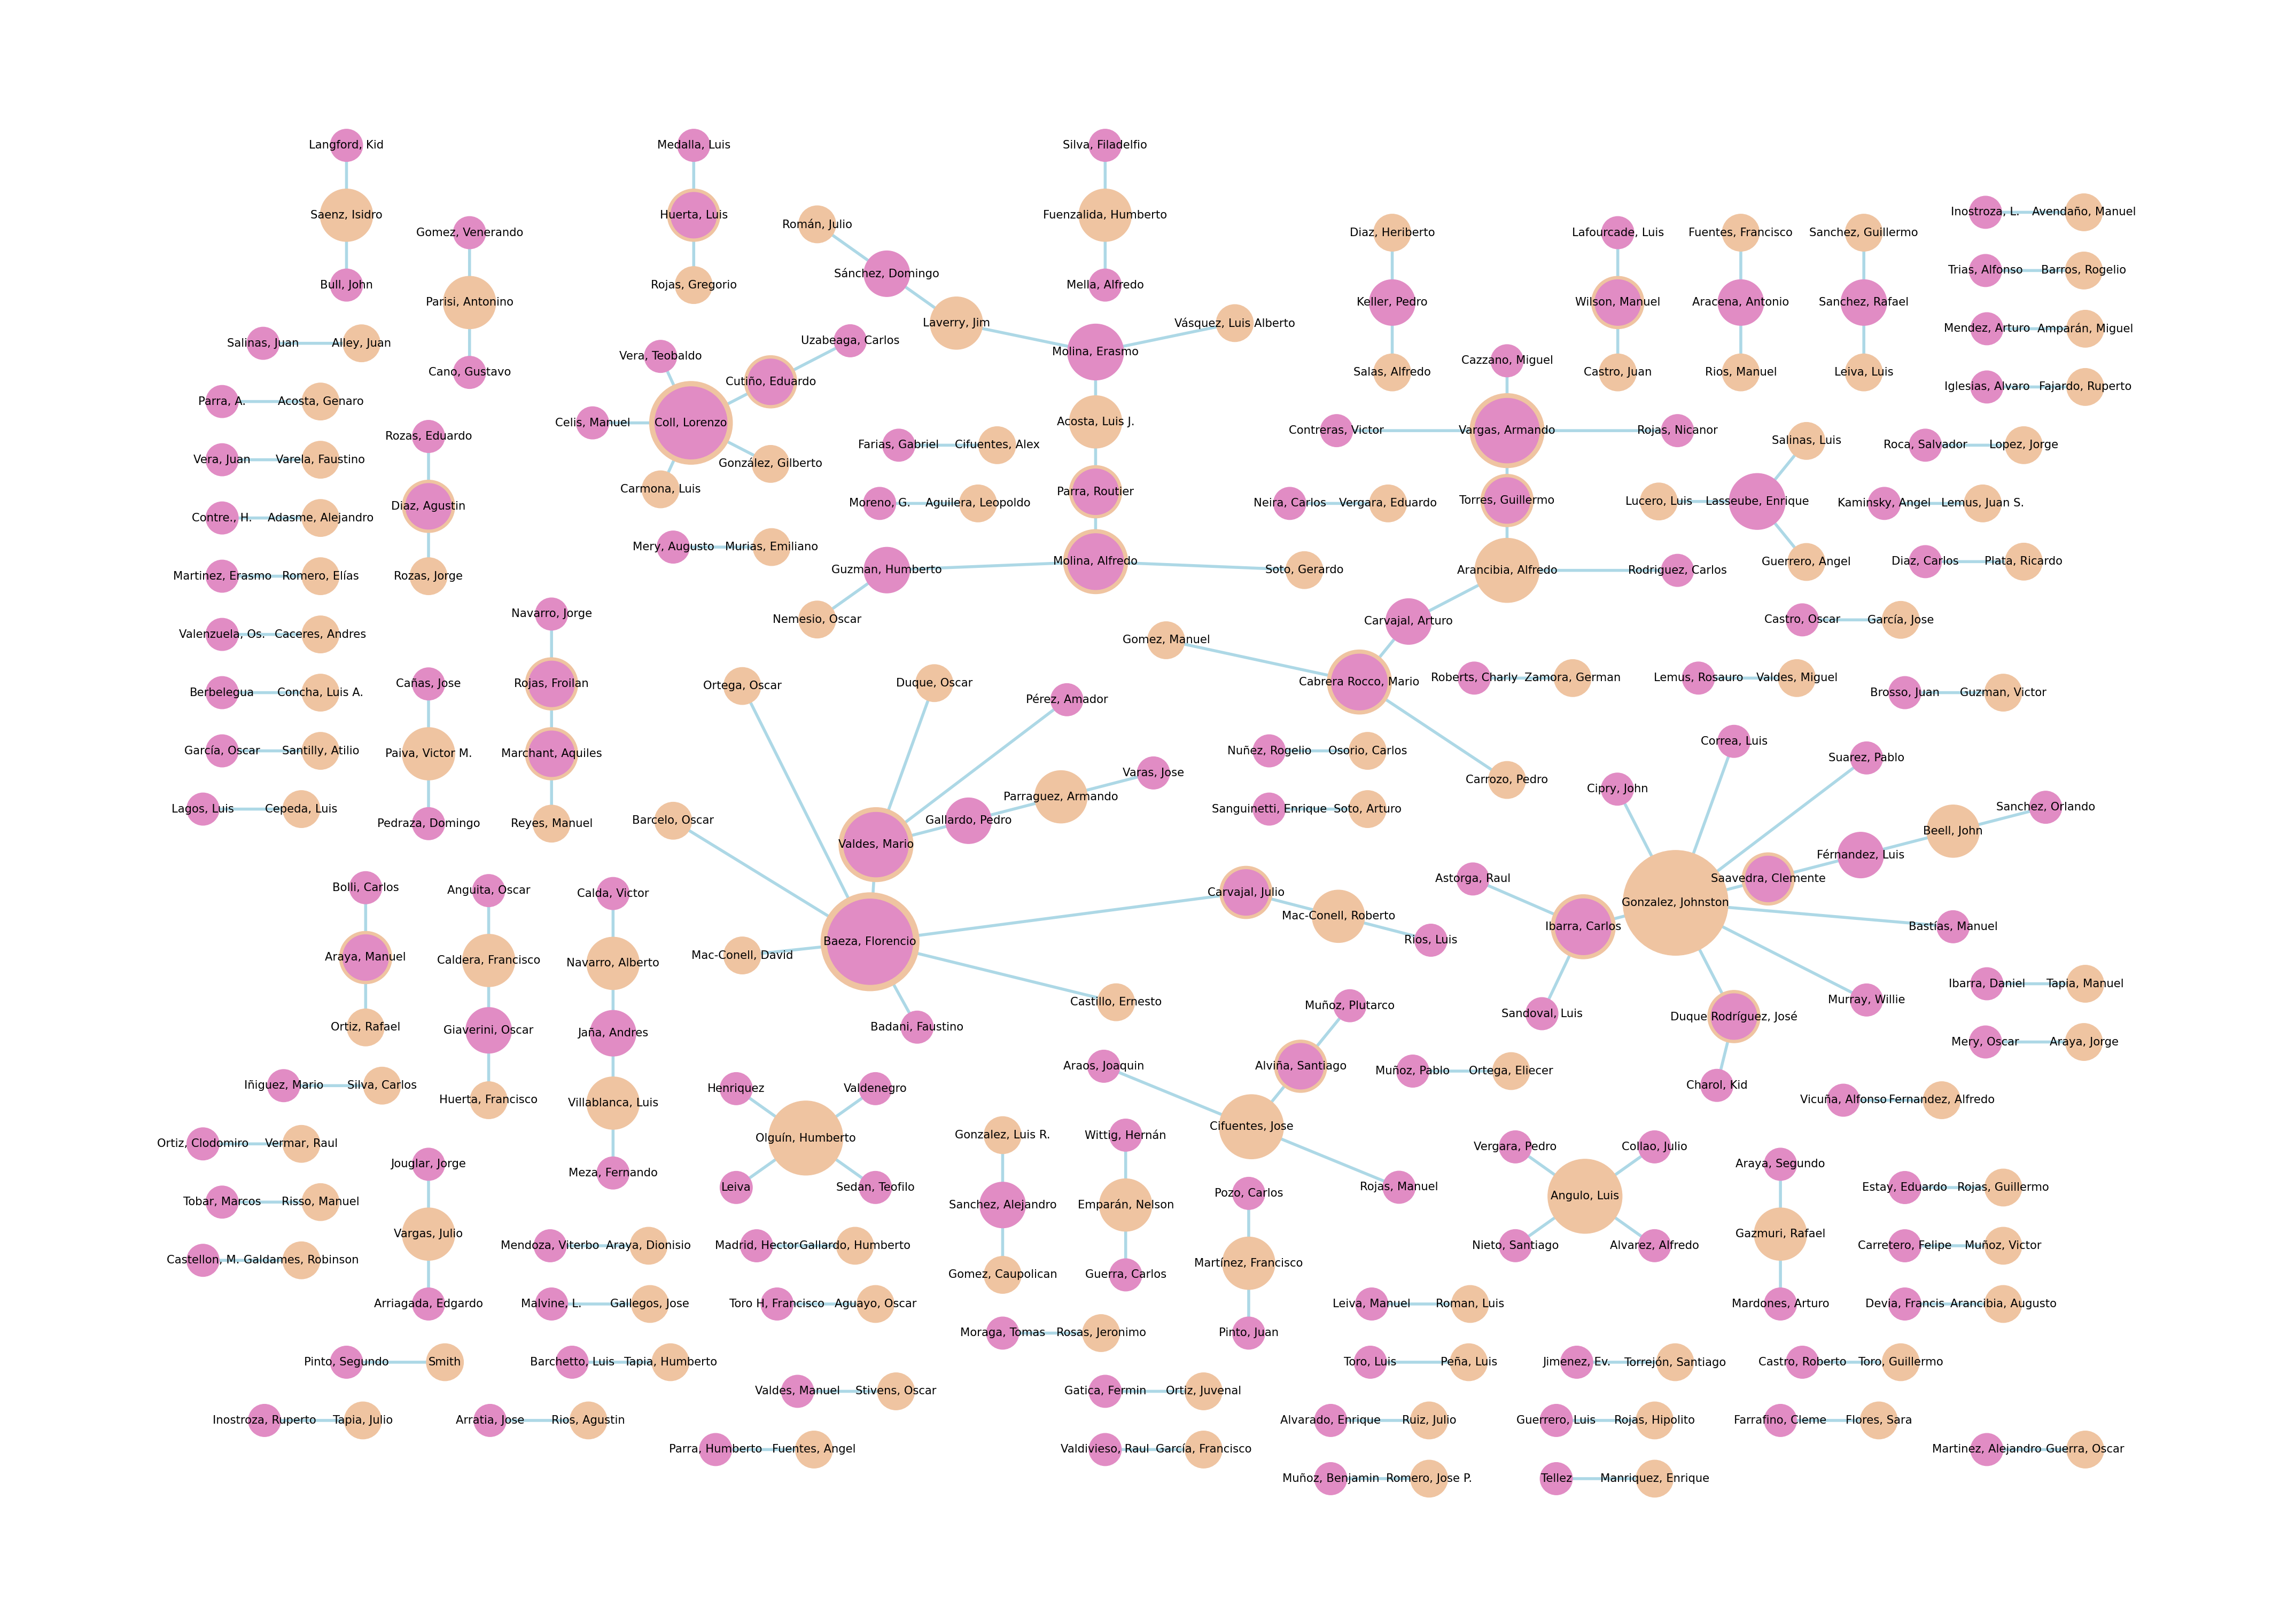

In [135]:
fig, ax = plt.subplots(figsize=(55, 40), dpi=100)
# 2. Create a layout for our nodes 
pos = nx.nx_agraph.graphviz_layout(CH, prog="twopi")
#pos["639"] = (0.005,0.005)
nx.draw_networkx_edges(CH, pos, edge_color='lightblue', arrows=True, arrowstyle ='-', arrowsize=65, width=4.0)
nx.draw_networkx_nodes(CH, pos, nodelist=challengers, node_size=size, node_color ='#EFC4A1')
nx.draw_networkx_nodes(CH, pos, nodelist=challenged, node_size=size_ed, node_color ='#E18CC4')
challengers_dict = dict(zip(challengers, challengers))
nx.draw_networkx_labels(CH, pos, labels = node_labels, font_size=15.2)
#nx.draw_networkx_edge_labels(CH, pos, edge_labels = edge_labels, font_size= 10)
#nx.draw_networkx_labels(CH, pos, labels=challenged_dict)
#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.title('Boxing Challenges - Degree Centrality', fontsize=60)
fig = plt.gcf()
#fig.savefig('figure_9.pdf', dpi=100, format='pdf', bbox_inches='tight') 
#fig.savefig('graph_centrality_02.svg', dpi=1200, format='svg', bbox_inches='tight') 
#fig.savefig('figure_9.png', dpi=100, format='png', bbox_inches='tight')
plt.show()

In [36]:
#Print network summary
print("Network summary: \n-----------------\n", nx.info(CH))

Network summary: 
-----------------
 Graph with 259 nodes and 171 edges


In [37]:
#Print network density
print("Network density: \n-----------------\n", nx.density(CH))

Network density: 
-----------------
 0.005118074885516746


In [44]:
johnston_path = nx.shortest_path(CH, source= 639, target= 535)

print("Shortest Path: \n-----------------\n", "Shortest path between Johnson Gonzalez and Orlando Sanchez", johnston_path)

Shortest Path: 
-----------------
 Shortest path between Johnson Gonzalez and Orlando Sanchez [639, 1026, 276, 1138, 535]


In [60]:
#find number of nodes they are connected with
print("\nNodes Gonzalez, Johnston is connected with :\n-------------------------------")
print(nx.degree(CH, 639))


Nodes Gonzalez, Johnston is connected with :
-------------------------------
8


In [73]:
#Function to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)

In [74]:
#Find centrality of nodes
print("\nCentrality :\n---------------")
sort_dict(nx.degree_centrality(CH))


Centrality :
---------------
639  =  0.031007751937984496
836  =  0.027131782945736434
1131  =  0.01937984496124031
833  =  0.015503875968992248
647  =  0.015503875968992248
178  =  0.015503875968992248
1414  =  0.015503875968992248
1010  =  0.011627906976744186
146  =  0.011627906976744186
935  =  0.011627906976744186
1079  =  0.011627906976744186
1261  =  0.011627906976744186
1389  =  0.011627906976744186
1549  =  0.011627906976744186
882  =  0.007751937984496124
827  =  0.007751937984496124
573  =  0.007751937984496124
332  =  0.007751937984496124
1012  =  0.007751937984496124
143  =  0.007751937984496124
1026  =  0.007751937984496124
732  =  0.007751937984496124
223  =  0.007751937984496124
1080  =  0.007751937984496124
1138  =  0.007751937984496124
276  =  0.007751937984496124
1142  =  0.007751937984496124
1157  =  0.007751937984496124
156  =  0.007751937984496124
1179  =  0.007751937984496124
1177  =  0.007751937984496124
1198  =  0.007751937984496124
1205  =  0.0077519379844961

In [75]:
print("\nBetweenness:\n--------------")
sort_dict(nx.betweenness_centrality(CH))


Betweenness:
--------------
639  =  0.0024432178083431365
836  =  0.002201912345790728
833  =  0.0015684855065906554
1026  =  0.0009953850330286851
1079  =  0.0008747323017524809
1010  =  0.0008144059361143788
332  =  0.0007540795704762766
935  =  0.0007540795704762766
827  =  0.0007239163876572256
1012  =  0.0007239163876572256
178  =  0.0007239163876572256
1080  =  0.0007239163876572256
276  =  0.0007239163876572256
835  =  0.0007239163876572256
1261  =  0.0006937532048381745
1409  =  0.0006334268392000724
1389  =  0.0005127741079238681
1249  =  0.00048261092510481704
1131  =  0.0004222845594667149
1138  =  0.00039212137664766385
156  =  0.00039212137664766385
890  =  0.00039212137664766385
1367  =  0.00039212137664766385
1250  =  0.0002714686453714596
921  =  0.0002714686453714596
647  =  0.0001809790969143064
1414  =  0.0001809790969143064
660  =  0.00015081591409525533
1549  =  0.00015081591409525533
223  =  0.00012065273127620426
146  =  9.04895484571532e-05
732  =  9.0489548457

In [62]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(CH))

False


In [63]:
# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(CH)
largest_component = max(components, key=len)

In [65]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = CH.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 7


In [67]:
degree_dict = dict(CH.degree(CH.nodes()))
nx.set_node_attributes(CH, degree_dict, 'degree')

In [71]:
print(CH.nodes[639])

{'bipartite': 'challenger', 'name': 'Gonzalez, Johnston', 'source': 'El Mercurio de Valparaiso', 'date': '1921-03-10', 'centrality': 0.031007751937984496, 'degree': 8}


In [82]:
sorted_degree = [sort_dict(nx.degree_centrality(CH))]

639  =  0.031007751937984496
836  =  0.027131782945736434
1131  =  0.01937984496124031
833  =  0.015503875968992248
647  =  0.015503875968992248
178  =  0.015503875968992248
1414  =  0.015503875968992248
1010  =  0.011627906976744186
146  =  0.011627906976744186
935  =  0.011627906976744186
1079  =  0.011627906976744186
1261  =  0.011627906976744186
1389  =  0.011627906976744186
1549  =  0.011627906976744186
882  =  0.007751937984496124
827  =  0.007751937984496124
573  =  0.007751937984496124
332  =  0.007751937984496124
1012  =  0.007751937984496124
143  =  0.007751937984496124
1026  =  0.007751937984496124
732  =  0.007751937984496124
223  =  0.007751937984496124
1080  =  0.007751937984496124
1138  =  0.007751937984496124
276  =  0.007751937984496124
1142  =  0.007751937984496124
1157  =  0.007751937984496124
156  =  0.007751937984496124
1179  =  0.007751937984496124
1177  =  0.007751937984496124
1198  =  0.007751937984496124
1205  =  0.007751937984496124
1212  =  0.0077519379844961

In [104]:
betweenness_dict = nx.betweenness_centrality(CH) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(CH, betweenness_dict, 'betweenness')

In [105]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)

Top 10 nodes by betweenness centrality:
(639, 0.0024432178083431365)
(836, 0.002201912345790728)
(833, 0.0015684855065906554)
(1026, 0.0009953850330286851)
(1079, 0.0008747323017524809)
(1010, 0.0008144059361143788)
(332, 0.0007540795704762766)
(935, 0.0007540795704762766)
(827, 0.0007239163876572256)
(1012, 0.0007239163876572256)


In [99]:
deg_dict = nx.degree_centrality(CH) # Run degree centrality

In [107]:
sorted_centr = sorted(deg_dict .items(), key=itemgetter(1), reverse=True)

In [108]:
print("Top 10 nodes by degree centrality:")
for b in sorted_centr[:10]:
    print(b)

Top 10 nodes by degree centrality:
(639, 0.031007751937984496)
(836, 0.027131782945736434)
(1131, 0.01937984496124031)
(833, 0.015503875968992248)
(647, 0.015503875968992248)
(178, 0.015503875968992248)
(1414, 0.015503875968992248)
(1010, 0.011627906976744186)
(146, 0.011627906976744186)
(935, 0.011627906976744186)


In [111]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Boxer_id:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Boxer_id: 639 | Betweenness Centrality: 0.0024432178083431365 | Degree: 0.031007751937984496
Boxer_id: 836 | Betweenness Centrality: 0.002201912345790728 | Degree: 0.027131782945736434
Boxer_id: 833 | Betweenness Centrality: 0.0015684855065906554 | Degree: 0.015503875968992248
Boxer_id: 1026 | Betweenness Centrality: 0.0009953850330286851 | Degree: 0.007751937984496124
Boxer_id: 1079 | Betweenness Centrality: 0.0008747323017524809 | Degree: 0.011627906976744186
Boxer_id: 1010 | Betweenness Centrality: 0.0008144059361143788 | Degree: 0.011627906976744186
Boxer_id: 332 | Betweenness Centrality: 0.0007540795704762766 | Degree: 0.007751937984496124
Boxer_id: 935 | Betweenness Centrality: 0.0007540795704762766 | Degree: 0.011627906976744186
Boxer_id: 827 | Betweenness Centrality: 0.0007239163876572256 | Degree: 0.007751937984496124
Boxer_id: 1012 | Betweenness Centrality: 0.0007239163876572256 | Degree: 0.007751937984496124
Boxer_id: 178 | Betweenness Centrality: 0.0007239163876572256 | Deg

In [113]:
from networkx.algorithms import community

In [115]:
communities = community.greedy_modularity_communities(CH)

In [116]:
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(CH, modularity_dict, 'modularity')

In [120]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: [865, 866, 835, 836, 833, 1284, 1355, 876, 272, 886, 1367, 1368, 890, 827, 826]
Class 1: [1024, 1026, 1539, 420, 935, 936, 639, 1138, 276, 535, 1048, 156, 1021, 190, 735]
Class 2: [1249, 1250, 332, 1197, 1292, 1261, 1262, 1010, 1012, 921, 188]
Class 3: [1409, 1445, 1253, 1388, 1389, 1455, 178, 1079, 1080, 62, 126]
Class 4: [660, 151, 1545, 1131, 284, 14, 1275]
Class 5: [1008, 423, 1314, 647, 1006]
Class 6: [1328, 1324, 732, 733, 223]
Class 7: [1425, 1414, 1415, 1417, 1418]
Class 8: [448, 561, 983, 1543, 1549]
Class 9: [891, 572, 573, 143]
Class 10: [146, 939, 77, 1255]
Class 11: [1240, 1386, 1212, 1215]
Class 12: [976, 882, 780]
Class 13: [1179, 1172, 1173]
Class 14: [1201, 1202, 1198]
Class 15: [1206, 1205, 982]
Class 16: [1210, 1141, 1142]
Class 17: [1177, 1171, 1223]
Class 18: [232, 530, 1228]
Class 19: [1232, 738, 539]
Class 20: [1245, 1157, 1158]
Class 21: [1267, 1268, 1269]
Class 22: [873, 842, 837]
Class 23: [1352, 889, 1351]
Class 24: [1458, 1459, 1460]
Class 25: [1499